In [81]:
import os
import numpy as np
import pandas as pd

from collections import defaultdict
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator


def tabulate_events(dpath):

    final_out = {}
    for dname in os.listdir(dpath):
        print(f"Converting run {dname}",end="")
        ea = EventAccumulator(os.path.join(dpath, dname)).Reload()
        tags = ea.Tags()['scalars']

        out = {}

        for tag in tags:
            tag_values=[]
            wall_time=[]
            steps=[]

            for event in ea.Scalars(tag):
                tag_values.append(event.value)
                wall_time.append(event.wall_time)
                steps.append(event.step)
            df = pd.DataFrame(data=dict(zip(steps, np.array([tag_values, wall_time]).transpose())),columns=steps,index=['value','wall_time'])
            df.to_csv(dpath+'/'+ dname+'/'+f'{tag}.csv')
    

    return final_out

In [82]:
if __name__ == '__main__':
    path = "default_depth_dl_aug"
    steps = tabulate_events(path)

Converting run v_02

In [83]:
t = pd.read_csv('default_depth_dl_aug/v_02/val_rms.csv')
t.head()

,Unnamed: 0,298,597,896,1195,1494,1793,2092,2391,2690,...,12258,12557,12856,13155,13454,13753,14052,14351,14650,14949
0,value,2.170634e+01,2.239059e+01,2.087096e+01,2.329898e+01,2.026290e+01,2.041788e+01,2.039132e+01,2.028113e+01,2.019299e+01,...,1.252416e+01,1.477342e+01,1.619740e+01,1.355848e+01,1.366504e+01,1.247927e+01,1.295880e+01,3.712009e+01,1.361088e+01,1.309813e+01
1,wall_time,1.615145e+09,1.615145e+09,1.615145e+09,1.615146e+09,1.615146e+09,1.615147e+09,1.615147e+09,1.615147e+09,1.615148e+09,...,1.615159e+09,1.615160e+09,1.615160e+09,1.615161e+09,1.615161e+09,1.615161e+09,1.615162e+09,1.615162e+09,1.615162e+09,1.615163e+09


In [84]:
x, y = t.T[0][1:], t.T[1][1:]

In [85]:
import matplotlib.pyplot as plt

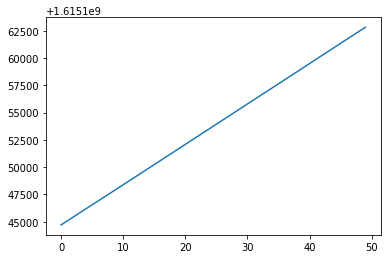

In [86]:
plt.plot(range(len(x)),y.values)